<a href="https://colab.research.google.com/github/parotnes/Course-AI/blob/main/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I need to import the dataset Fashion MNIST from keras using python and Colab

In [2]:
# Install TensorFlow if not already installed
!pip install tensorflow

# Import libraries
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Load Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Print the shape of the loaded datasets
print("Shape of training images:", train_images.shape)
print("Shape of training labels:", train_labels.shape)
print("Shape of test images:", test_images.shape)
print("Shape of test labels:", test_labels.shape)


Excellent, now I need statistical data on the dataset, for example, a graph showing the amount of images in each class.
In addition, you will show me 25 random images from the dataset in a 5x5 square

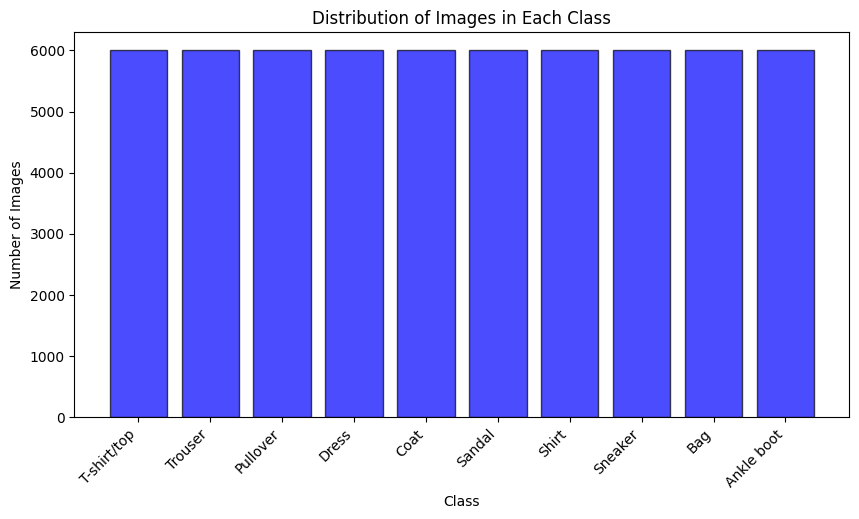

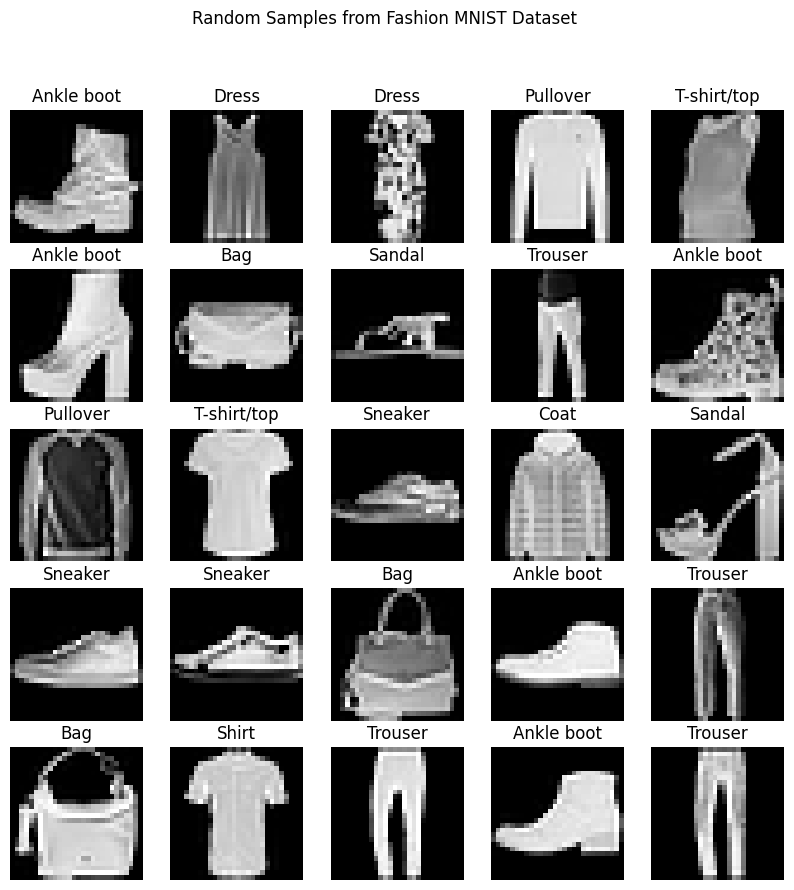

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Class labels for Fashion MNIST
class_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Plot the distribution of images in each class
plt.figure(figsize=(10, 5))
plt.hist(train_labels, bins=np.arange(11) - 0.5, alpha=0.7, rwidth=0.8, color='blue', edgecolor='black')
plt.xticks(np.arange(10), class_labels, rotation=45, ha="right")
plt.title("Distribution of Images in Each Class")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

# Show 25 random images from the dataset in a 5x5 grid
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    index = np.random.randint(0, train_images.shape[0])
    plt.imshow(train_images[index], cmap='gray')
    plt.title(class_labels[train_labels[index]])
    plt.axis('off')

plt.suptitle("Random Samples from Fashion MNIST Dataset")
plt.show()


Build a fully connected neural network with 3 layers, the first layer receives a 28x28 black and white image. A second layer with 128 neurons that includes the relu activation function. A third layer with 10 neurons and a softmax activation function.

Finally I want the result with the highest probability

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Flatten the 28x28 images to a 1D array
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Input layer

    # Hidden layer with 128 neurons and ReLU activation
    layers.Dense(128, activation='relu'),

    # Output layer with 10 neurons and Softmax activation
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model architecture
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 4.2013 - accuracy: 0.6861 - val_loss: 0.8088 - val_accuracy: 0.6880
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7279 - accuracy: 0.7330 - val_loss: 0.7721 - val_accuracy: 0.7182
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6029 - accuracy: 0.7805 - val_loss: 0.6117 - val_accuracy: 0.7709
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5574 - accuracy: 0.8030 - val_loss: 0.5659 - val_accuracy: 0.8126
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5198 - accuracy: 0.8180 - val_loss: 0.5398 - val_accuracy: 0.8158
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5090 - accuracy: 0.8218 - val_loss: 0.6508 - val_accuracy: 0.7965
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4953 - accuracy: 0.8254 - val_loss: 0.5505 - val_accura

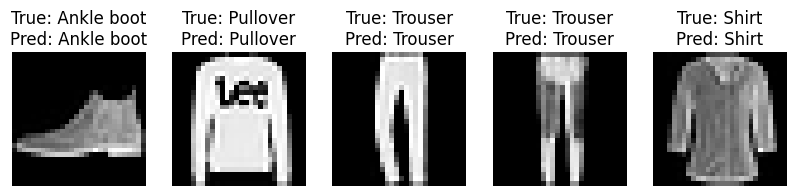

In [11]:
# Train the model on the Fashion MNIST dataset
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Get predictions for the test set
predictions = model.predict(test_images)

# Find the index with the highest probability for each prediction
predicted_labels = np.argmax(predictions, axis=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Display the first 5 test images along with their predicted labels
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"True: {class_labels[test_labels[i]]}\nPred: {class_labels[predicted_labels[i]]}")
    plt.axis('off')
plt.show()


Epoch 1/15
1875/1875 [==============================] - 9s 4ms/step - loss: 2.7928 - accuracy: 0.7037 - val_loss: 0.7531 - val_accuracy: 0.7497
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6518 - accuracy: 0.7709 - val_loss: 0.6541 - val_accuracy: 0.7757
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5684 - accuracy: 0.7990 - val_loss: 0.6282 - val_accuracy: 0.7941
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5384 - accuracy: 0.8126 - val_loss: 0.5652 - val_accuracy: 0.8181
Epoch 5/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5119 - accuracy: 0.8239 - val_loss: 0.5600 - val_accuracy: 0.8158
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4994 - accuracy: 0.8288 - val_loss: 0.5754 - val_accuracy: 0.8072
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4890 - accuracy: 0.8333 - val_loss: 0.5226 - val_accurac

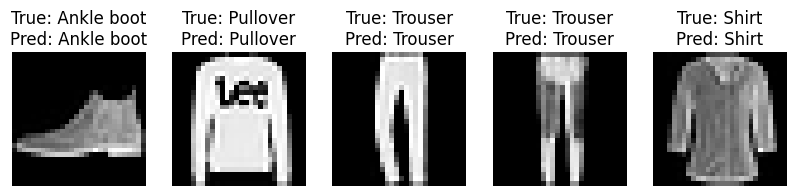

In [16]:
# Train the model on the Fashion MNIST dataset
history = model.fit(train_images, train_labels, epochs=15, validation_data=(test_images, test_labels))

# Get predictions for the test set
predictions = model.predict(test_images)

# Find the index with the highest probability for each prediction
predicted_labels = np.argmax(predictions, axis=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Display the first 5 test images along with their predicted labels
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"True: {class_labels[test_labels[i]]}\nPred: {class_labels[predicted_labels[i]]}")
    plt.axis('off')
plt.show()